In [1]:
my_list = [1,3,5,2,6,4,7,8,0,9]

def oracle(my_input):
    winner = 7
    if my_input is winner:
        response = True
    else:
        response = False
    return response

In [2]:
for i, n, in enumerate(my_list):
    if oracle(n) == True:
        print("Found the winner at index %i"%i)
        print("Used %i calls to the Oracle"%(i+1))
        break

Found the winner at index 6
Used 7 calls to the Oracle


In [2]:
from qiskit import *
import numpy as np
import matplotlib
%matplotlib inline

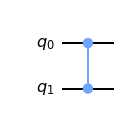

In [6]:
oracle = QuantumCircuit(2, name='Oracle')
oracle.cz(0,1)
oracle.draw(output='mpl')

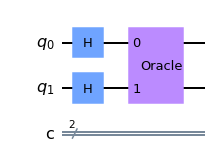

In [7]:
#Check that this does was you want
#Prepare state S with a hadamard
backend = Aer.get_backend('statevector_simulator')
grover_cirq = QuantumCircuit(2,2)
grover_cirq.h([0,1])
grover_cirq.append(oracle,[0,1])
grover_cirq.draw(output='mpl')

In [10]:
job = execute(grover_cirq, backend)
result = job.result()
sv = result.get_statevector()
np.around(sv,2)
#Flipped the |11> state!

array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

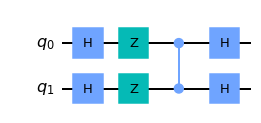

In [12]:
#Need amplitude amplification because the negative amp of the winner doesn't show up in measurements 
#One way to think of reflection operator is applying negative phase to
#every state that is orthogonal to the given reflecting state
reflection = QuantumCircuit(2, name='Reflection')
reflection.h([0,1])
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1])
reflection.to_gate()
reflection.draw(output='mpl')

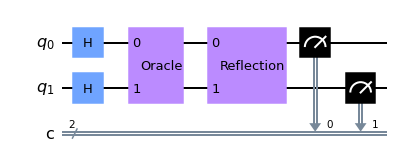

In [23]:
backend = Aer.get_backend('statevector_simulator')
grover_cirq = QuantumCircuit(2,2)
grover_cirq.h([0,1])
grover_cirq.append(oracle,[0,1])
grover_cirq.append(reflection,[0,1])
grover_cirq.measure([0,1],[0,1])
grover_cirq.draw(output='mpl')

In [22]:
job=execute(grover_cirq,backend,shots=1)
result = job.result()
result.get_counts()

{'11': 1}

In [24]:
#Sudoku Problem Next
